e:\Apps\anaconda3\envs\iag\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Apps\anaconda3\envs\iag\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Apps\anaconda3\envs\iag\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Apps\anaconda3\envs\iag\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.type


Distribution Statistics for iag_trust_confidence_scale11:
                      count      mean       std  min  25%   50%   75%   max
Likely to recommend                                                        
Detract               496.0  6.078629  2.176984  0.0  5.0   6.0   8.0  10.0
Passive              1923.0  7.741550  1.432227  0.0  7.0   8.0   9.0  10.0
Promote              6074.0  9.322358  1.051672  0.0  9.0  10.0  10.0  10.0
Super Detract         610.0  2.372131  2.680136  0.0  0.0   1.0   4.0  10.0

Distribution Statistics for iag_value_price_of_policy_reflects_scale11:
                      count      mean       std  min  25%  50%   75%   max
Likely to recommend                                                       
Detract               478.0  6.075314  2.155043  0.0  5.0  6.0   8.0  10.0
Passive              1826.0  7.121577  1.596745  0.0  6.0  7.0   8.0  10.0
Promote              5828.0  8.810741  1.485254  0.0  8.0  9.0  10.0  10.0
Super Detract         581.0  3.175559

e:\Apps\anaconda3\envs\iag\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Apps\anaconda3\envs\iag\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Apps\anaconda3\envs\iag\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Apps\anaconda3\envs\iag\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

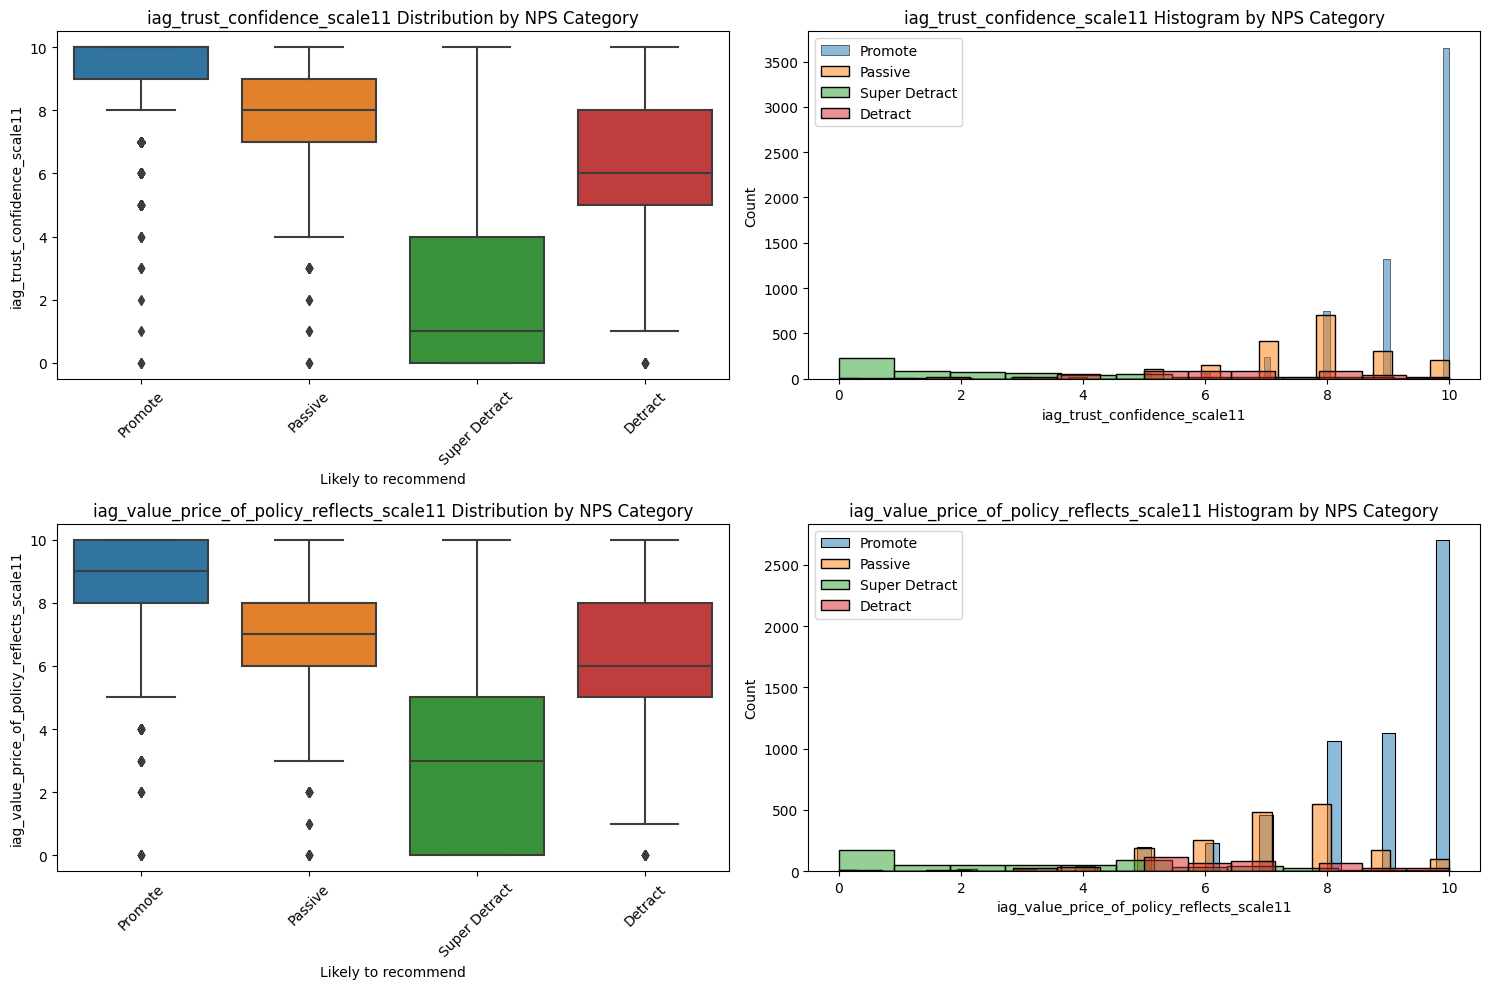


Proposed Thresholds for iag_trust_confidence_scale11:

Promote:
25th percentile: 9.00
Median: 10.00
75th percentile: 10.00

Passive:
25th percentile: 7.00
Median: 8.00
75th percentile: 9.00

Super Detract:
25th percentile: 0.00
Median: 1.00
75th percentile: 4.00

Detract:
25th percentile: 5.00
Median: 6.00
75th percentile: 8.00

Proposed Thresholds for iag_value_price_of_policy_reflects_scale11:

Promote:
25th percentile: 8.00
Median: 9.00
75th percentile: 10.00

Passive:
25th percentile: 6.00
Median: 7.00
75th percentile: 8.00

Super Detract:
25th percentile: 0.00
Median: 3.00
75th percentile: 5.00

Detract:
25th percentile: 5.00
Median: 6.00
75th percentile: 8.00


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
df = pd.read_excel('../../data/IAG.xlsx')

# Distribution analysis
def analyze_score_distributions(df):
    # List of numerical scale columns to analyze
    scale_columns = [
        'iag_trust_confidence_scale11',
        'iag_value_price_of_policy_reflects_scale11'
    ]
    
    # Create subplots
    fig, axes = plt.subplots(len(scale_columns), 2, figsize=(15, 5*len(scale_columns)))
    
    for idx, col in enumerate(scale_columns):
        # Boxplot by NPS category
        sns.boxplot(data=df, x='Likely to recommend', y=col, ax=axes[idx, 0])
        axes[idx, 0].set_title(f'{col} Distribution by NPS Category')
        axes[idx, 0].tick_params(axis='x', rotation=45)
        
        # Distribution statistics
        stats = df.groupby('Likely to recommend')[col].describe()
        print(f"\nDistribution Statistics for {col}:")
        print(stats)
        
        # Histogram with NPS categories
        for category in df['Likely to recommend'].unique():
            sns.histplot(data=df[df['Likely to recommend'] == category][col], 
                        label=category, ax=axes[idx, 1], alpha=0.5)
        axes[idx, 1].set_title(f'{col} Histogram by NPS Category')
        axes[idx, 1].legend()
    
    plt.tight_layout()
    plt.show()
    
    # Calculate potential thresholds based on percentiles in each category
    for col in scale_columns:
        print(f"\nProposed Thresholds for {col}:")
        for category in df['Likely to recommend'].unique():
            data = df[df['Likely to recommend'] == category][col]
            q1, median, q3 = data.quantile([0.25, 0.5, 0.75])
            print(f"\n{category}:")
            print(f"25th percentile: {q1:.2f}")
            print(f"Median: {median:.2f}")
            print(f"75th percentile: {q3:.2f}")

# Run the analysis
analyze_score_distributions(df)

In [5]:
import pandas as pd
import numpy as np

# Read the data
df = pd.read_excel('../../data/IAG.xlsx')

# Define bins and labels for trust confidence
trust_bins = [-np.inf, 4, 6, 9, np.inf]  # Changed format
trust_labels = ['Very Low', 'Low', 'Moderate', 'High']

# Define bins and labels for price value
price_bins = [-np.inf, 5, 7, 8, np.inf]  # Changed format
price_labels = ['Poor', 'Fair', 'Good', 'Excellent']

# Implement binning
df['trust_level'] = pd.cut(df['iag_trust_confidence_scale11'], 
                          bins=trust_bins, 
                          labels=trust_labels)

df['price_value_level'] = pd.cut(df['iag_value_price_of_policy_reflects_scale11'], 
                                bins=price_bins, 
                                labels=price_labels)

# Validate binning
print("Trust Level Distribution:")
print(df['trust_level'].value_counts())
print("\nPercentage Distribution:")
print(df['trust_level'].value_counts(normalize=True).round(3)*100)

print("\nPrice Value Level Distribution:")
print(df['price_value_level'].value_counts())
print("\nPercentage Distribution:")
print(df['price_value_level'].value_counts(normalize=True).round(3)*100)

# Cross-tabulation
print("\nCross-tabulation of Trust Level vs NPS categories:")
print(pd.crosstab(df['trust_level'], df['Likely to recommend']))
print("\nCross-tabulation of Price Value Level vs NPS categories:")
print(pd.crosstab(df['price_value_level'], df['Likely to recommend']))

# Save updated dataset
df.to_excel('IAG_binned.xlsx', index=False)


Trust Level Distribution:
trust_level
Moderate    3977
High        3889
Very Low     625
Low          612
Name: count, dtype: int64

Percentage Distribution:
trust_level
Moderate    43.7
High        42.7
Very Low     6.9
Low          6.7
Name: proportion, dtype: float64

Price Value Level Distribution:
price_value_level
Excellent    4179
Good         1701
Fair         1644
Poor         1189
Name: count, dtype: int64

Percentage Distribution:
price_value_level
Excellent    48.0
Good         19.5
Fair         18.9
Poor         13.6
Name: proportion, dtype: float64

Cross-tabulation of Trust Level vs NPS categories:
Likely to recommend  Detract  Passive  Promote  Super Detract
trust_level                                                  
Very Low                 104       33       13            475
Low                      164      259      114             75
Moderate                 207     1425     2295             50
High                      21      206     3652             10

Cross-

PermissionError: [Errno 13] Permission denied: 'IAG_binned.xlsx'

In [7]:
import pandas as pd
import numpy as np

# Read the data
df = pd.read_excel('../../data/IAG.xlsx')

# Filter for Passive customers
passive_customers = df[df['Likely to recommend'] == 'Passive']

# Analyze trust confidence scores for Passive customers
trust_scores = passive_customers['iag_trust_confidence_scale11']
price_scores = passive_customers['iag_value_price_of_policy_reflects_scale11']

# Function to calculate detailed statistics
def calculate_detailed_stats(series):
    stats = series.describe()
    
    # Calculate frequency distribution
    freq = series.value_counts().sort_index()
    freq_pct = (series.value_counts(normalize=True) * 100).sort_index().round(1)
    
    return {
        'basic_stats': stats,
        'frequency': freq,
        'frequency_pct': freq_pct
    }

# Calculate statistics for both metrics
print("\nTrust Confidence Statistics for Passive Customers:")
trust_stats = calculate_detailed_stats(trust_scores)
print("\nBasic Statistics:")
print(trust_stats['basic_stats'])
print("\nFrequency Distribution:")
print(trust_stats['frequency'])
print("\nPercentage Distribution:")
print(trust_stats['frequency_pct'].astype(str) + '%')

print("\nPrice Value Statistics for Passive Customers:")
price_stats = calculate_detailed_stats(price_scores)
print("\nBasic Statistics:")
print(price_stats['basic_stats'])
print("\nFrequency Distribution:")
print(price_stats['frequency'])
print("\nPercentage Distribution:")
print(price_stats['frequency_pct'].astype(str) + '%')


Trust Confidence Statistics for Passive Customers:

Basic Statistics:
count    1923.000000
mean        7.741550
std         1.432227
min         0.000000
25%         7.000000
50%         8.000000
75%         9.000000
max        10.000000
Name: iag_trust_confidence_scale11, dtype: float64

Frequency Distribution:
iag_trust_confidence_scale11
0.0       4
1.0       2
2.0       2
3.0      12
4.0      13
5.0     110
6.0     149
7.0     419
8.0     698
9.0     308
10.0    206
Name: count, dtype: int64

Percentage Distribution:
iag_trust_confidence_scale11
0.0      0.2%
1.0      0.1%
2.0      0.1%
3.0      0.6%
4.0      0.7%
5.0      5.7%
6.0      7.7%
7.0     21.8%
8.0     36.3%
9.0     16.0%
10.0    10.7%
Name: proportion, dtype: object

Price Value Statistics for Passive Customers:

Basic Statistics:
count    1826.000000
mean        7.121577
std         1.596745
min         0.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        10.000000
Name: iag_value_price_o

In [14]:
import pandas as pd
import numpy as np

# Read the data
df = pd.read_excel('../../data/IAG.xlsx')

# Define new bins and labels based on Passive customer distribution analysis
trust_bins = [-np.inf, 5, 7, 8, 9, np.inf]
trust_labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']

price_bins = [-np.inf, 5, 6, 7, 8, np.inf]
price_labels = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']

# Create new binned columns with temporary names
df['temp_trust'] = pd.cut(df['iag_trust_confidence_scale11'], 
                         bins=trust_bins, 
                         labels=trust_labels)

df['temp_price'] = pd.cut(df['iag_value_price_of_policy_reflects_scale11'], 
                         bins=price_bins, 
                         labels=price_labels)

# Drop original columns and rename new ones
df.drop(['iag_trust_confidence_scale11', 'iag_value_price_of_policy_reflects_scale11'], axis=1, inplace=True)
df.rename(columns={
    'temp_trust': 'iag_trust_confidence_scale11',
    'temp_price': 'iag_value_price_of_policy_reflects_scale11'
}, inplace=True)

# Validate binning
print("Trust Level Distribution:")
print(df['iag_trust_confidence_scale11'].value_counts())
print("\nPercentage Distribution:")
print(df['iag_trust_confidence_scale11'].value_counts(normalize=True).round(3)*100)

print("\nPrice Value Level Distribution:")
print(df['iag_value_price_of_policy_reflects_scale11'].value_counts())
print("\nPercentage Distribution:")
print(df['iag_value_price_of_policy_reflects_scale11'].value_counts(normalize=True).round(3)*100)

# Cross-tabulation
print("\nCross-tabulation of Trust Level vs NPS categories:")
print(pd.crosstab(df['iag_trust_confidence_scale11'], df['Likely to recommend']))
print("\nCross-tabulation of Price Value Level vs NPS categories:")
print(pd.crosstab(df['iag_value_price_of_policy_reflects_scale11'], df['Likely to recommend']))

# Save updated dataset
df.to_excel('IAG_binned.xlsx', index=False)

Trust Level Distribution:
iag_trust_confidence_scale11
Very High    3889
High         1678
Moderate     1544
Low          1059
Very Low      933
Name: count, dtype: int64

Percentage Distribution:
iag_trust_confidence_scale11
Very High    42.7
High         18.4
Moderate     17.0
Low          11.6
Very Low     10.2
Name: proportion, dtype: float64

Price Value Level Distribution:
iag_value_price_of_policy_reflects_scale11
Excellent    4179
Very Good    1701
Poor         1189
Good         1066
Fair          578
Name: count, dtype: int64

Percentage Distribution:
iag_value_price_of_policy_reflects_scale11
Excellent    48.0
Very Good    19.5
Poor         13.6
Good         12.2
Fair          6.6
Name: proportion, dtype: float64

Cross-tabulation of Trust Level vs NPS categories:
Likely to recommend           Detract  Passive  Promote  Super Detract
iag_trust_confidence_scale11                                          
Very Low                          190      143       71            529
Lo

We analyzed the Passive customer segment to create more meaningful bins for both trust and price value metrics. Here's what we discovered and implemented:

Trust Confidence Binning:

Passive customers showed strong concentration in scores 7-9 (74.1%)
New bins created at 5, 7, 8, and 9 to better capture the gradients
This splits the previous "Moderate" category to better differentiate customer segments


Price Value Binning:

Passive customers clustered around scores 6-8 (70%)
New bins created at 5, 6, 7, and 8 to capture this distribution
This provides better granularity in the middle range where Passives concentrate


Key Improvements:

More granular categories around Passive customer scores
Better separation of the middle ranges
Maintained interpretability while increasing discriminative power
Bins now align better with natural breakpoints in the data



This new binning strategy should provide better feature discrimination for modeling, particularly for identifying and understanding the Passive customer segment.